In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=18, titlepad=10)

In [8]:
import pandas as pd

data = pd.read_csv("./red-wine.csv")

y = data.quality
X = data.drop(["quality"], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3)


In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=[X_train.shape[1]]),
    layers.Dense(1024),
    layers.Activation("relu"),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=1024, activation="relu"),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=1024, activation="relu"),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1)
    
])

model.compile(optimizer="adam", loss="mae")

history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    verbose=0,
    batch_size=256,
    epochs=100
)



<Axes: >

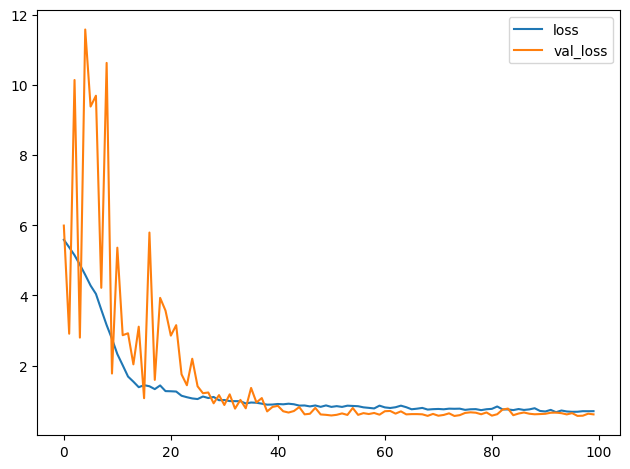

In [16]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ["loss", "val_loss"]].plot()


In [18]:
history_df.val_loss.min()

0.5641785860061646